In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
DF = pd.read_csv('Customers.csv')
df = DF
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [63]:
DF1 = pd.read_csv('Products.csv')
df1 = DF1
df1

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [65]:
DF2 = pd.read_csv('Transactions.csv')
df2 = DF2
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [67]:
df.shape, df1.shape, df2.shape

((200, 4), (100, 4), (1000, 7))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [75]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df2['TransactionDate'] = pd.to_datetime(df2['TransactionDate'])

In [77]:
df.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [79]:
df2.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


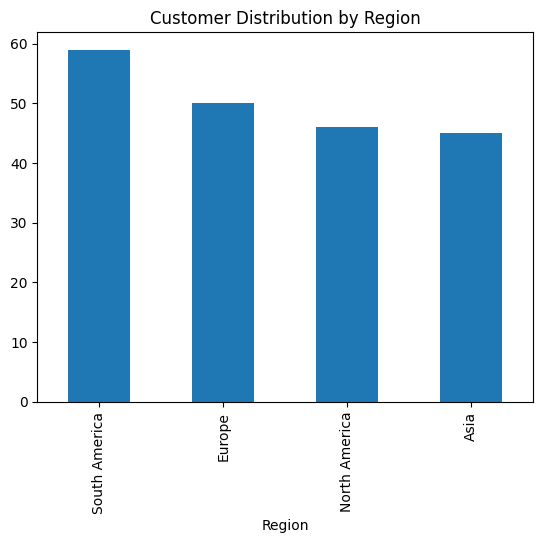

In [81]:
region_dist = df['Region'].value_counts()
print(region_dist)

region_dist.plot(kind='bar', title = 'Customer Distribution by Region')
plt.show()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


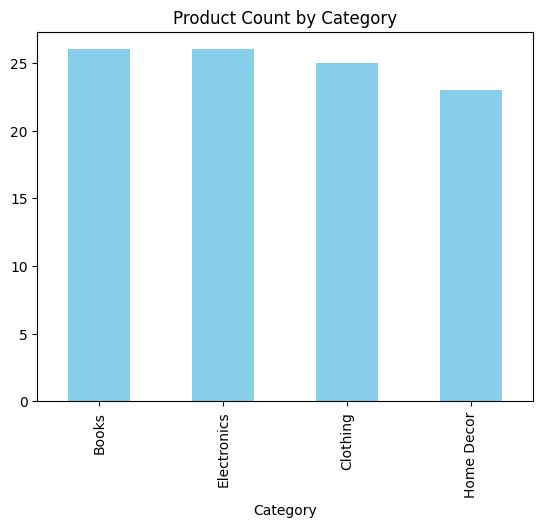

In [83]:
category_dist = df1['Category'].value_counts()
print(category_dist.head())

category_dist.plot(kind = 'bar', title = 'Product Count by Category', color = 'skyblue')
plt.show()

   ProductID         ProductName     Category   Price
19      P020   ActiveWear Jacket     Clothing  396.34
28      P029  TechPro Headphones  Electronics  433.64
47      P048    TechPro Cookbook        Books  416.40
61      P062     HomeSense Novel        Books  374.16
78      P079      ActiveWear Rug   Home Decor  417.37
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


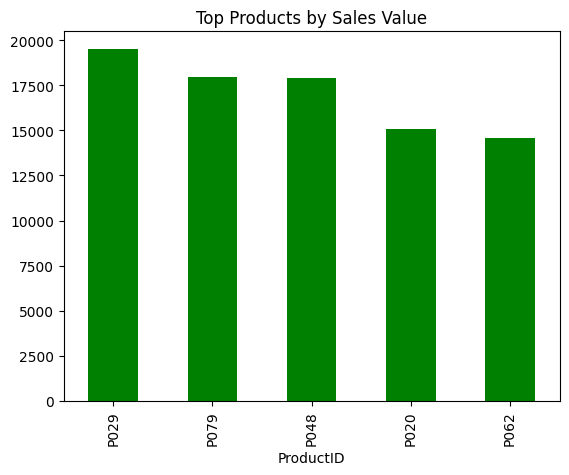

In [85]:
rows = df1.loc[df1['ProductID'].isin(['P029', 'P079', 'P048', 'P020', 'P062'])]
print(rows)

top_products = df2.groupby('ProductID')['TotalValue'].sum().sort_values(ascending = False).head()
print(top_products)


top_products.plot(kind='bar', title='Top Products by Sales Value', color='green')
plt.show()

In [87]:
merged_data = pd.merge(df2, df, on = 'CustomerID', how = 'left')
merged_data = pd.merge(merged_data, df1, on = 'ProductID', how = 'left')

In [89]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


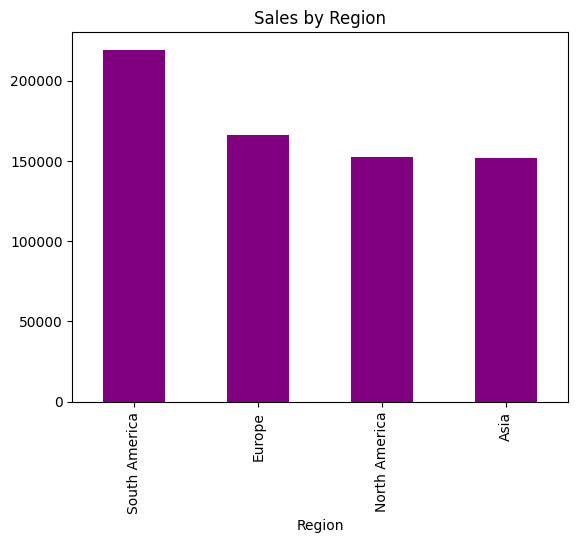

In [91]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending = False)
print(sales_by_region)

sales_by_region.plot(kind='bar', title = 'Sales by Region', color = 'purple')
plt.show()

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


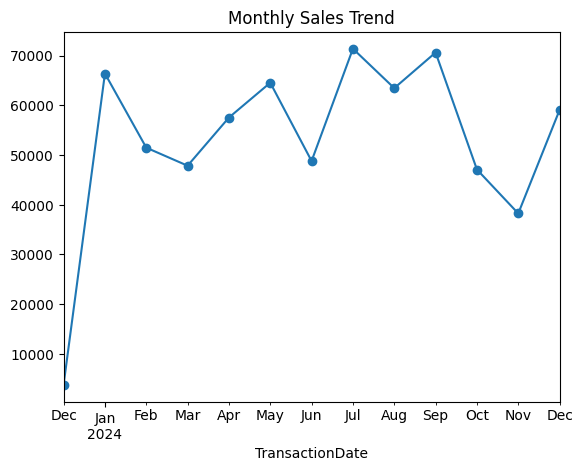

In [93]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(sales_trend)

sales_trend.plot(kind='line', title='Monthly Sales Trend', marker='o')
plt.show()

In [95]:
merged_data.to_csv('Merged_Data.csv', index = False)

In [97]:
from IPython.display import FileLink
FileLink('Merged_Data.csv')

/Users/adityagarg/Zeotap/Merged_Data.csv